# **Import Library**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import zipfile,os,shutil

%matplotlib inline
drive.mount('/content/drive')

Mounted at /content/drive


# **Directory**

## **Dataset Directory**

In [2]:
local_zip = '/content/drive/Othercomputers/My Laptop/submission/flower_classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
base_dir = '/content/flower_classification'

os.listdir(base_dir)

['Lavender', 'Rose', 'Lily', 'Daisy', 'Sunflower']

# **Image Data Generator**

In [4]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    horizontal_flip = True,
                    rotation_range = 20,
                    shear_range = 0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'categorical',
    subset='validation')

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


# **Model**

## **Model Architecture**

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.4),  
  tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.4),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dense(5, activation = 'softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       3

## **Callback**

In [7]:
class StopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85):
      print('Accuracy has reached', logs.get('accuracy'))
      self.model.stop_training = True

callbacks = StopTraining()

## **Train Model**

In [8]:
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    verbose = 2,
    batch_size = 128,
    callbacks = [callbacks],
)

Epoch 1/30
32/32 - 42s - loss: 1.4071 - accuracy: 0.3952 - val_loss: 1.2080 - val_accuracy: 0.6170 - 42s/epoch - 1s/step
Epoch 2/30
32/32 - 28s - loss: 1.0189 - accuracy: 0.6110 - val_loss: 0.9056 - val_accuracy: 0.6710 - 28s/epoch - 875ms/step
Epoch 3/30
32/32 - 29s - loss: 0.8493 - accuracy: 0.6773 - val_loss: 0.9776 - val_accuracy: 0.6320 - 29s/epoch - 916ms/step
Epoch 4/30
32/32 - 28s - loss: 0.7631 - accuracy: 0.7075 - val_loss: 0.7405 - val_accuracy: 0.7090 - 28s/epoch - 886ms/step
Epoch 5/30
32/32 - 28s - loss: 0.7257 - accuracy: 0.7195 - val_loss: 0.7524 - val_accuracy: 0.7270 - 28s/epoch - 876ms/step
Epoch 6/30
32/32 - 28s - loss: 0.6944 - accuracy: 0.7345 - val_loss: 0.6795 - val_accuracy: 0.7490 - 28s/epoch - 873ms/step
Epoch 7/30
32/32 - 28s - loss: 0.6490 - accuracy: 0.7617 - val_loss: 0.6849 - val_accuracy: 0.7090 - 28s/epoch - 868ms/step
Epoch 8/30
32/32 - 28s - loss: 0.6194 - accuracy: 0.7710 - val_loss: 0.7099 - val_accuracy: 0.7240 - 28s/epoch - 886ms/step
Epoch 9/30


# **Plot**

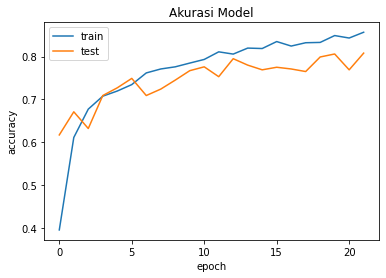

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

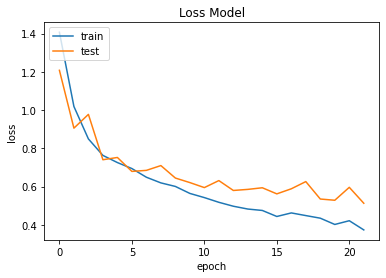

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Predict Image**

Saving Daisy (2).jpeg to Daisy (2).jpeg
1/1 [==============================] - 0s 198ms/step
[[0. 0. 1. 0. 0.]]


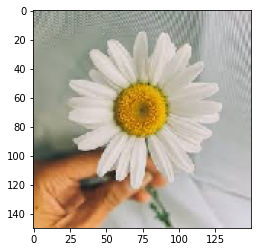

In [11]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=128)
  print(classes)

# **TF-Lite**

## **Saved Model**

In [12]:
save_path = 'predict_flower_species'
tf.saved_model.save(model, save_path)

## **Convert to TF-Lite**

In [13]:
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)